In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [2]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-classification/versions/4",input_shape=IMAGE_SHAPE+(3,) ,output_shape=[1001])
])
classifier.build([None, 224, 224, 3])  # Batch input shape.

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

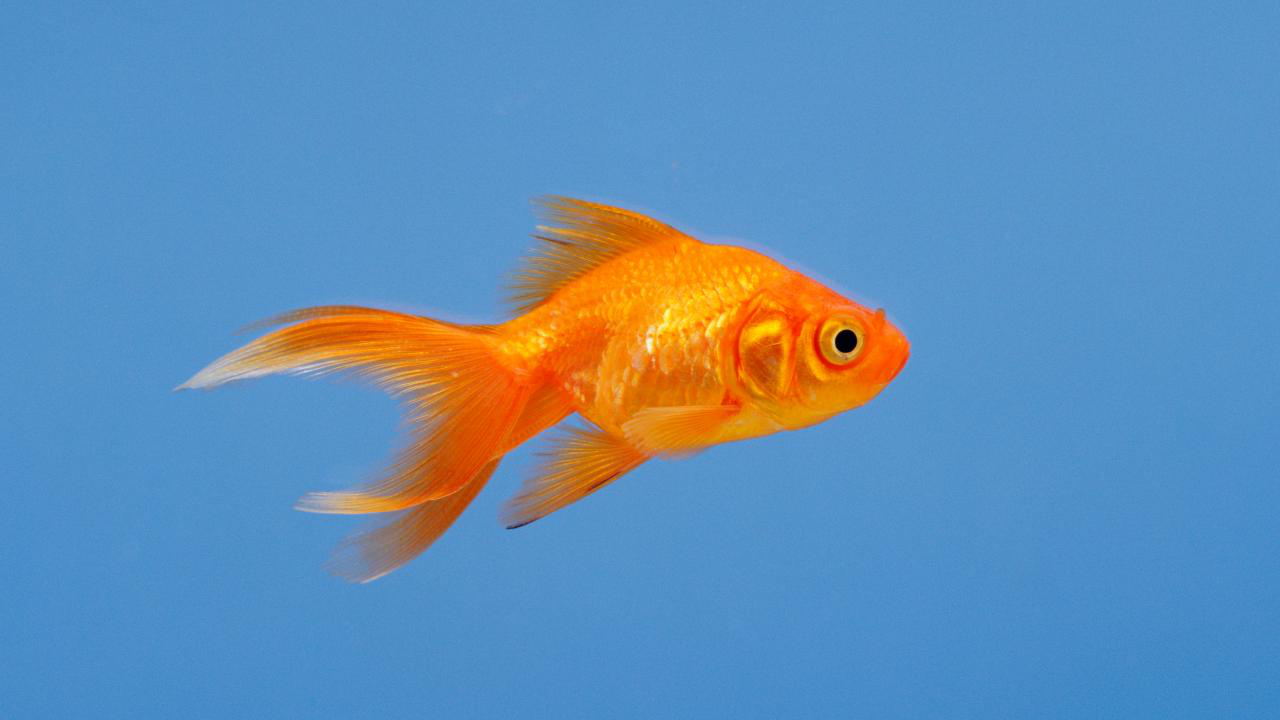

In [4]:
Image.open('goldfish.jpeg')

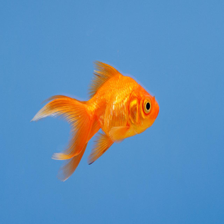

In [5]:
gold_fish = Image.open('goldfish.jpeg').resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 1s 1s/step


array([[ 0.24632296,  2.1894386 , 10.4528265 , ..., -2.276865  ,
        -0.72966117,  0.34242022]], dtype=float32)

In [9]:
result.shape

(1, 1001)

In [10]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [11]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[predicted_label_index]

'goldfish'

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url, cache_dir=".", untar=True)

In [14]:
data_dir

'.\\datasets\\flower_photos'

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [16]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [17]:
roses = list(data_dir.glob("roses/*") )
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

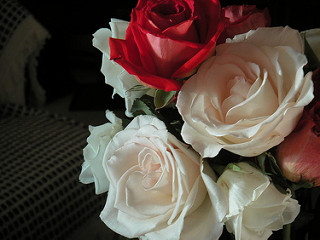

In [18]:
Image.open(str(roses[1]))

In [19]:
flower_img_dict = {
    'roses': list(data_dir.glob("roses/*") ),
    'daisy': list(data_dir.glob("daisy/*") ),
    'dandelion': list(data_dir.glob("dandelion/*") ),
    'sunflowers': list(data_dir.glob("sunflowers/*") ),
    'tulips': list(data_dir.glob("tulips/*") ),
}

In [20]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
num_classes = len(flower_labels_dict)
num_classes

5

In [22]:
flower_img_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [23]:
str(flower_img_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [24]:
X, y = [], []

In [25]:
for flower_name,images in flower_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [26]:
X = np.array(X)
y = np.array(y)
len(X)

3670

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [28]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

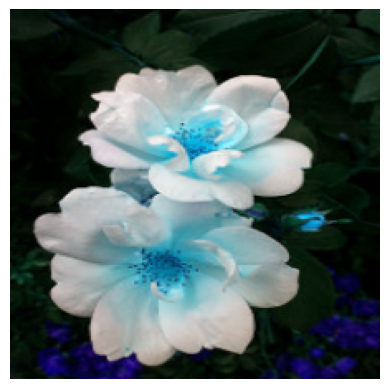

In [29]:
plt.axis('off')
plt.imshow(X[0])